# **Story**

In a village, there is a research project aimed at improving the quality of life for residents through data analysis. Researchers have collected various data from each household in the village. The collected data includes information on drinking water sources, sanitation conditions, household appliance usage, and various other health and economic indicators.

The researchers want to use machine learning methods to analyze this data. They have two main objectives:
1. **Drinking Water Quality Classification** <br>
Researchers want to create a model that can predict whether the drinking water in a household is safe to drink based on other available features in the dataset. In the collected data, there is a variable DC201 that indicates the drinking water quality (Safe to Drink or Not Safe to Drink). This model will help the village government identify households that need more attention in providing clean water.

2. **Household Segmentation**<br>
Researchers also want to cluster households into several segments based on their similar characteristics. The goal of this segmentation is to understand common patterns in the data and help design more targeted intervention programs. For example, a segment of households with poor sanitation access can be prioritized in sanitation improvement programs.


# **Dataset**
- **Variabel Description.xlsx**: metadata
- **Data Tugas 3.csv**: main dataset used in model development

# **Exercise**
1. Conduct an analysis of the provided data.
2. Perform and explain the exploration and visualization processes you undertook. It is mandatory to interpret the results of the visualizations and explain the next steps or their impact on the analysis.
3. Conduct data preprocessing steps and explain why you used those methods.
4. Process the data to achieve the best results. Processing includes Classification Analysis and Segmentation Analysis.
5. Interpret or visualize your processing results.

### Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# add other

### Dataset

In [3]:
df = pd.read_csv("Data Tugas 3.csv")
display(df) # Look on to Variabel Description.xlsx to see information for each variable

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,Layak Minum
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,Layak Minum
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,Layak Minum
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,Layak Minum
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,Layak Minum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,47958,94,1,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,NaN,0.0,0.0,0.0,1,21.0,9.0,Layak Minum
35969,47959,94,1,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,12.0,Layak Minum
35970,47961,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1,11.0,48.0,Layak Minum
35971,47962,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,39.0,Layak Minum


In [4]:
from sklearn.metrics import silhouette_score

for cols in df.columns:
    df[cols].fillna(df[cols].mode()[0], inplace = True)

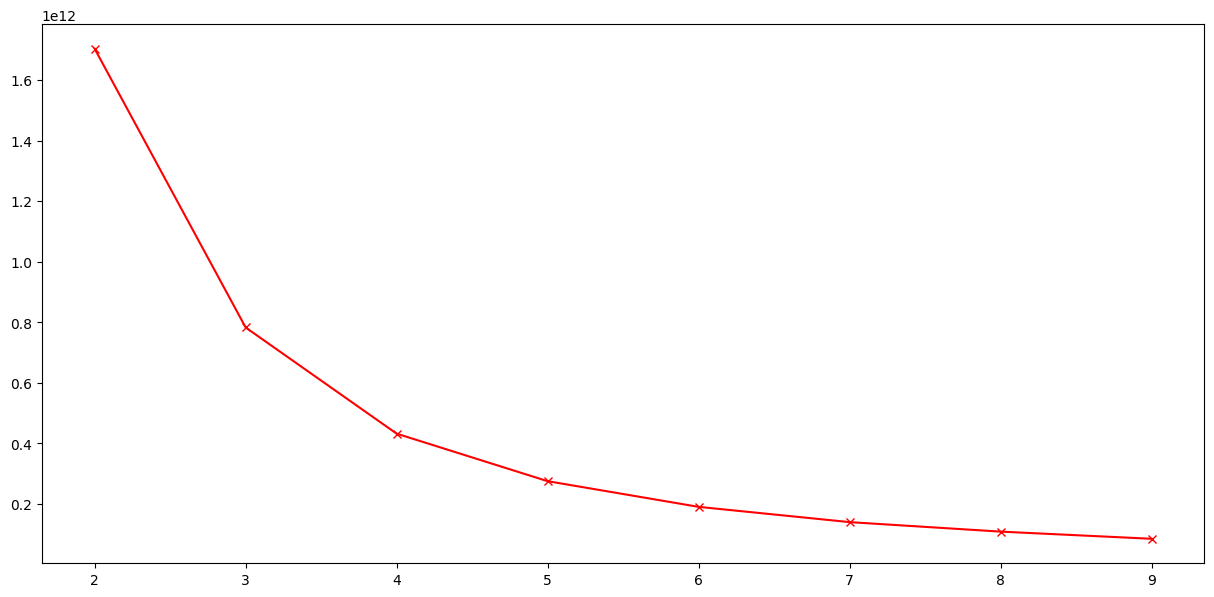

In [5]:
# Membuat grafik untuk menentukan jumlah k yang optimal

from sklearn.cluster import KMeans

inertia = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state = 26)
    kmeans.fit(df.drop('DC201', axis = 1))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 7))

plt.plot(range(2,10), inertia, 'rx-')

In [6]:
kmeans = KMeans(n_clusters = 3, random_state = 26)
kmeans.fit(df.drop('DC201', axis = 1))

df_non = df.drop('DC201', axis = 1)
df_non['Kluster'] = kmeans.labels_

In [10]:
silhouette_score(df.drop('DC201', axis = 1), kmeans.labels_)

0.5832774841246433

In [8]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(df.drop('DC201', axis = 1), kmeans.labels_)

0.5134683933102391

In [13]:
# Bagaimana jika menggunakan metode silhouette untuk menentukan jumlah k?
# Apakah jumlah k akan berubah? Apakah jumlah k optimal dapat ditentukan dengan lebih jelas?

from sklearn.metrics import silhouette_score

silhouette_avg = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state = 26)
    kmeans.fit(df.drop('DC201', axis = 1))
    silhouette = silhouette_score(df.drop('DC201', axis = 1), kmeans.labels_)
    silhouette_avg.append(silhouette)

plt.figure(figsize=(15, 7))

plt.plot(range(2,10), silhouette_avg, 'bo-')

KeyboardInterrupt: 

### Exploratory Data Analysis

In [ ]:
# At least 5 Viz or data exploration

...

#### **Penjelasan**
---
Bla bla bla
Bla bla bla
Bla bla bla

### Pre-prepocessing

In [ ]:
# At least 3 type of data pre-processing

...

#### **Penjelasan**
---
Bla bla bla
Bla bla bla
Bla bla 

### Processing 1<sup>st</sup> Analysis

In [ ]:
# Use >2 method for each analysis, and compare the result

...

### Interpretation

#### **Penjelasan**
---
Bla bla bla
Bla bla bla
Bla bla bla

### Processing 2<sup>nd</sup> Analysis

In [ ]:
# Use >2 method for each analysis, and compare the result

...

### Interpretation

#### **Penjelasan**
---
Bla bla bla
Bla bla bla
Bla bla bla